# Résolution d'équations non linéaires

Importation des packages de calcul scientifique pour Python 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


Dans ce TP, on va mettre en oeuvre les méthodes vues en cours pour la résolution d'équations non linéaires du type

$$
F(x) = 0,
$$

où $F$ est une fonction de $\mathbb{R}$ dans $\mathbb{R}$. Ces méthodes sont au nombre de 3: la méthode de dichotomie, la méthode du point fixe et la méthode de Newton. Nous allons nous intéresser au cas où la fonction $F$ est donnée par

$$
F(x) = 10^{-1}x^2 - \cos(x/2)-e^{-x/4}.
$$

## Graphe de $F$ et localisation grossière des racines

Afin de se faire une idée de la fonction (et de ses racines), on se propose tout d'abord de tracer le graphe de $F$. Pour cela, on commence par implémenter la fonction $F$ qui prendra en entrée un vecteur $x$ et donnera en sortie un vecteur $y$ de même taille que $x$ et tel que, pour tout indice $k$,

$$
y_k = F(x_k).
$$

Ensuite, on trace le graphe de $F$ à l'aide de la fonction `plt.plot` sur l'intervalle $[-10,10]$ avec un millier de points.

> **À faire **: Implémenter la fonction $F$ et tracer son graphe. Donner un intervalle de longueur $1$ autour de chaque racine $F$ dans l'intervalle $[-10,10]$.

In [2]:
def F(x):
    return 0.1*np.power(x,2)-np.cos(x/2)-np.exp(-x/4)

> **Réponse **:...

## Méthode de dichotomie

On passe maintenant au calcul de racines par la méthode de dichotomie. Pour cela, on va implémenter une fonction `Dichotomie` qui aura comme arguments d'entrée:

- une fonction `F` dont on cherche une racine,
- un scalaire `a` et un scalaire `b` pour définir l'intervalle initial,
- un scalaire `eps` pour le critère d'arrêt (qui aura, par défaut, la valeur $10^{-10}$),
- un entier `itermax` pour le nombre maximal d'itérations (qui aura, par défaut, la valeur $100$),

et comme arguments de sortie:

- un vecteur `X` qui contient la suite $(x_k)_{0\leq j\leq k}$ construite par la méthode et dont le dernier élément est l'approximation d'une racine de `F`,
- un entier `k` correspondant au nombre total d'itérations réalisées.

> **À faire **: Implémenter la méthode de la dichotomie. Tester celle-ci sur la fonction $F$ avec comme intervalle initial $[-10,10]$ puis calculer la plus grande racine de $F$ sur l'intervalle $[-10,10]$ à une précision de $10^{-12}$.

In [5]:
def Dichotomie(F, a, b, eps = 1e-10, itermax = 100):
    x=(a+b)/2
    if itermax == 1 or np.abs(F((a+b)/2)) < eps: 
        return [x], 1
    else:
        if F(x) > 0:
            a,b = a,(a+b)/2
        else:
            a,b = (a+b)/2,b
        z,k = Dichotomie(F, a, b, eps, itermax-1)
        return [x] + z, k+1

Dichotomie(F, -10, 10)

([0.0,
  5.0,
  2.5,
  3.75,
  3.125,
  2.8125,
  2.65625,
  2.734375,
  2.6953125,
  2.71484375,
  2.705078125,
  2.7001953125,
  2.69775390625,
  2.698974609375,
  2.6995849609375,
  2.69927978515625,
  2.699127197265625,
  2.6992034912109375,
  2.6992416381835938,
  2.699260711669922,
  2.699270248413086,
  2.699275016784668,
  2.699277400970459,
  2.6992762088775635,
  2.6992756128311157,
  2.699275314807892,
  2.699275463819504,
  2.699275389313698,
  2.699275426566601,
  2.6992754451930523,
  2.699275454506278,
  2.699275459162891,
  2.6992754614911973,
  2.6992754626553506,
  2.699275462073274,
  2.6992754617822357],
 36)

## Méthode du point fixe

À présent, on va implémenter la méthode du point fixe. On implémentera pour cela une fonction `Point_fixe` qui aura comme arguments d'entrée:
- une fonction `F` dont on cherche une racine,
- une fonction `Fp` correspondant à la dérivée de `F`,
- un scalaire `x_0` correspondant à la valeur initial de la méthode,
- un scalaire `a` et un scalaire `b` pour définir l'intervalle où évaluer la dérivée,
- un scalaire `eps` pour le critère d'arrêt (qui aura, par défaut, la valeur $10^{-10}$),
- un entier `itermax` pour le nombre maximal d'itérations (qui aura, par défaut, la valeur $100$),

et comme arguments de sortie:

- un vecteur `X` qui contient la suite $(x_k)_{0\leq j\leq k}$ construite par la méthode et dont le dernier élément est l'approximation d'une racine de `F`,
- un entier `k` correspondant au nombre total d'itérations réalisées.

> **À faire **: Calculer la dérivée de la fonction $F$ et implémenter sous une fonction `Fp`. Puis implémenter la méthode du point fixe. Cette méthode peut s'écrire sous la forme suivante
$$
\left\{\begin{array}{ll}
x_0\in I = [a,b]\textrm{ tel que la racine recherchée est dans $I$ et $F$ est monotone sur $I$},\\
M = \left\{\begin{array}{ll}\sup_{y\in I} F'(y),\textrm{ si $F$ est croissante sur $I$}\\\\inf_{y\in I} F'(y),\textrm{ si $F$ est décroissante sur $I$}
\end{array}\right.\\
x_{k+1} = x_k - \frac{F(x_k)}{M},\quad k\geq 0.
\end{array}\right.
$$

In [7]:
def Fp(x):
    return x/5 + np.exp(-x/4)/4 + 1/2 * np.sin(x/2)

def Point_fixe(F, Fp, x_0, a, b, eps = 1e-10, itermax = 100):
    if itermax == 1 or np.abs(F(x_0)) < eps: 
        return [x_0], 1
    else:
        x = x_0 - F(x_0)/max(Fp(np.linspace(a,b,100)))
        z,k = Point_fixe(F, Fp, x, a, b, eps, itermax-1)
        return [x] + z, k+1

Point_fixe(F, Fp, 0, 0, 5)

([1.4565732668036875,
  2.351598899553091,
  2.6336616295668587,
  2.688500056282112,
  2.6975544847705875,
  2.699001866796287,
  2.699231998807407,
  2.6992685581606186,
  2.6992743652800857,
  2.6992752876680135,
  2.699275434177237,
  2.6992754574482927,
  2.6992754611445924,
  2.6992754617317005,
  2.699275461824955,
  2.699275461824955],
 16)

> **À faire **:  Ensuite, tester la méthode du point fixe sur la fonction $F$ avec comme valeur initiale $0$ et sur l'intervalle $[0,5]$.

## Méthode de Newton

On passe enfin à la méthode de Newton. On implémentera pour cela une fonction `Newton` qui aura comme arguments d'entrée:
- une fonction `F` dont on cherche une racine,
- une fonction `Fp` qui correspond à la dérivée de `F`,
- un scalaire `x_0` correspondant à la valeur initial de la méthode,
- un scalaire `eps` pour le critère d'arrêt (qui aura, par défaut, la valeur $10^{-10}$),
- un entier `itermax` pour le nombre maximal d'itérations (qui aura, par défaut, la valeur $100$),

et comme arguments de sortie:

- un vecteur `X` qui contient la suite $(x_k)_{0\leq j\leq k}$ construite par la méthode et dont le dernier élément est l'approximation d'une racine de `F`,
- un entier `k` correspondant au nombre total d'itérations réalisées.

> **À faire **: Implémenter la méthode de Newton. Tester cette dernière avec comme condition initiale $x_0 = -3$.

In [40]:
def Newton(F, Fp, x_0, eps = 1e-10, itermax = 100):
    if itermax == 1 or np.abs(F(x_0)) < eps: 
        return [x_0], 1
    else:
        x = x_0 - F(x_0)/Fp(x_0)
        z,k = Newton(F, Fp, x, eps, itermax-1)
        return [x_0] + z, k+1

Newton(F, Fp, 0)

([0,
  8.0,
  2.4893031409566584,
  2.7040360388114535,
  2.6992776442489648,
  2.699275461843024],
 6)

## Comparaison des méthodes

Dans cette dernière section, on va comparer les méthodes et notamment la vitesse de convergence de celle-ci. Tout d'abord, on va calculer chacune des racines de $F$ avec une précision de $10^{-15}$ à l'aide de la méthode de votre choix. On note $x^*_i$ la $i$-ème racine de $F$ obtenue de cette manière. Ensuite, on va tracer l'évolution, pour chaque méthode et pour chaque racine de $F$, de l'erreur:

$$
e_n^{(k)} = \log_{10} (|x_n-x_k^*|),
$$
pour $n$ allant de $0$ jusqu'au nombre total d'itérations de chaque méthode. 


> **À faire **: Tracer, pour chaque racine, l'évolution de $e_n^{(k)}$ pour chaque méthode sur un même graphique. Les conditions initiales seront $x_0 = -7, -5$ et $2$. Pour la méthode de la dichotomie, on commencera avec un intervalle de taille $1$ tel que $a$ ou $b$ est égal à $x_0$. L'évaluation du paramètre $M$ pour la méthode du point fixe se fera sur le même intervalle que l'intervalle de départ de la dichotomie. Le paramètre `eps` sera fixé à $10^{-12}$. Commenter le résultat.

2.6992754618425643


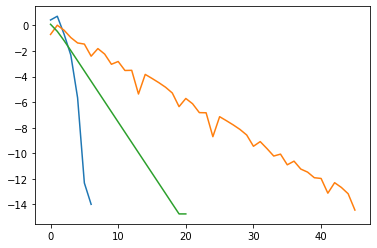

In [55]:
# calcul des racines de F
x_test = Newton(F, Fp, 0, eps=10e-15)[0][-1]
print(x_test)
e1_newton= np.log10(np.abs(Newton(F, Fp, 0, eps=10e-15)[0] - x_test + 10e-15))
e1_pf= np.log10(np.abs(Point_fixe(F, Fp, 0, 0, 5, eps=10e-15)[0] - x_test))
e1_dichotomie= np.log10(np.abs(Dichotomie(F, 0, 5, eps=10e-15)[0] - x_test))

plt.plot(e1_newton)
plt.plot(e1_dichotomie)
plt.plot(e1_pf)
